In [315]:
import pandas as pd
import numpy as np
import sys
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt
%matplotlib inline

In [316]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO
    
data = StringIO('''year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0,0
1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140,4.33,5.6,179.386,0.27,4.06
1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
1960,2,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55
1960,3,2839.022,1785.8,296.375,474.676,1967.8,29.750,140.9,2.36,5.6,181.528,2.7,-0.34
1960,4,2802.616,1788.2,259.764,476.434,1966.6,29.840,141.1,2.29,6.3,182.287,1.21,1.08
1961,1,2819.264,1787.7,266.405,475.854,1984.5,29.810,142.1,2.37,6.8,182.992,-0.4,2.77
1961,2,2872.005,1814.3,286.246,480.328,2014.4,29.920,142.9,2.29,7,183.691,1.47,0.81
1961,3,2918.419,1823.1,310.227,493.828,2041.9,29.980,144.1,2.32,6.8,184.524,0.8,1.52
1961,4,2977.830,1859.6,315.463,502.521,2082.0,30.040,145.2,2.60,6.2,185.242,0.8,1.8
1962,1,3031.241,1879.4,334.271,520.960,2101.7,30.210,146.4,2.73,5.6,185.874,2.26,0.47
1962,2,3064.709,1902.5,331.039,523.066,2125.2,30.220,146.5,2.78,5.5,186.538,0.13,2.65
1962,3,3093.047,1917.9,336.962,538.838,2137.0,30.380,146.7,2.78,5.6,187.323,2.11,0.67
1962,4,3100.563,1945.1,325.650,535.912,2154.6,30.440,148.3,2.87,5.5,188.013,0.79,2.08
1963,1,3141.087,1958.2,343.721,522.917,2172.5,30.480,149.7,2.90,5.8,188.580,0.53,2.38
1963,2,3180.447,1976.9,348.730,518.108,2193.1,30.690,151.3,3.03,5.7,189.242,2.75,0.29
1963,3,3240.332,2003.8,360.102,546.893,2217.9,30.750,152.6,3.38,5.5,190.028,0.78,2.6
1963,4,3264.967,2020.6,364.534,532.383,2254.6,30.940,153.7,3.52,5.6,190.668,2.46,1.06
1964,1,3338.246,2060.5,379.523,529.686,2299.6,30.950,154.8,3.51,5.5,191.245,0.13,3.38
1964,2,3376.587,2096.7,377.778,526.175,2362.1,31.020,156.8,3.47,5.2,191.889,0.9,2.57
1964,3,3422.469,2135.2,386.754,522.008,2392.7,31.120,159.2,3.53,5,192.631,1.29,2.25
1964,4,3431.957,2141.2,389.910,514.603,2420.4,31.280,160.7,3.76,5,193.223,2.05,1.71
1965,1,3516.251,2188.8,429.145,508.006,2447.4,31.380,162,3.93,4.9,193.709,1.28,2.65
1965,2,3563.960,2213.0,429.119,508.931,2474.5,31.580,163.1,3.84,4.7,194.303,2.54,1.3
1965,3,3636.285,2251.0,444.444,529.446,2542.6,31.650,166,3.93,4.4,194.997,0.89,3.04
1965,4,3724.014,2314.3,446.493,544.121,2594.1,31.880,169.1,4.35,4.1,195.539,2.9,1.46
1966,1,3815.423,2348.5,484.244,556.593,2618.4,32.280,171.8,4.62,3.9,195.999,4.99,-0.37
1966,2,3828.124,2354.5,475.408,571.371,2624.7,32.450,170.3,4.65,3.8,196.560,2.1,2.55
1966,3,3853.301,2381.5,470.697,594.514,2657.8,32.850,171.2,5.23,3.8,197.207,4.9,0.33
1966,4,3884.520,2391.4,472.957,599.528,2688.2,32.900,171.9,5.00,3.7,197.736,0.61,4.39
1967,1,3918.740,2405.3,460.007,640.682,2728.4,33.100,174.2,4.22,3.8,198.206,2.42,1.8
1967,2,3919.556,2438.1,440.393,631.430,2750.8,33.400,178.1,3.78,3.8,198.712,3.61,0.17
1967,3,3950.826,2450.6,453.033,641.504,2777.1,33.700,181.6,4.42,3.8,199.311,3.58,0.84
1967,4,3980.970,2465.7,462.834,640.234,2797.4,34.100,184.3,4.90,3.9,199.808,4.72,0.18
1968,1,4063.013,2524.6,472.907,651.378,2846.2,34.400,186.6,5.18,3.7,200.208,3.5,1.67
1968,2,4131.998,2563.3,492.026,646.145,2893.5,34.900,190.5,5.50,3.5,200.706,5.77,-0.28
1968,3,4160.267,2611.5,476.053,640.615,2899.3,35.300,194,5.21,3.5,201.290,4.56,0.65
1968,4,4178.293,2623.5,480.998,636.729,2918.4,35.700,198.7,5.85,3.4,201.760,4.51,1.34
1969,1,4244.100,2652.9,512.686,633.224,2923.4,36.300,200.7,6.08,3.4,202.161,6.67,-0.58
1969,2,4256.460,2669.8,508.601,623.160,2952.9,36.800,201.7,6.49,3.4,202.677,5.47,1.02
1969,3,4283.378,2682.7,520.360,623.613,3012.9,37.300,202.9,7.02,3.6,203.302,5.4,1.63
1969,4,4263.261,2704.1,492.334,606.900,3034.9,37.900,206.2,7.64,3.6,203.849,6.38,1.26
1970,1,4256.573,2720.7,476.925,594.888,3050.1,38.500,206.7,6.76,4.2,204.401,6.28,0.47
1970,2,4264.289,2733.2,478.419,576.257,3103.5,38.900,208,6.66,4.8,205.052,4.13,2.52
1970,3,4302.259,2757.1,486.594,567.743,3145.4,39.400,212.9,6.15,5.2,205.788,5.11,1.04
1970,4,4256.637,2749.6,458.406,564.666,3135.1,39.900,215.5,4.86,5.8,206.466,5.04,-0.18
1971,1,4374.016,2802.2,517.935,542.709,3197.3,40.100,220,3.65,5.9,207.065,2,1.65
1971,2,4398.829,2827.9,533.986,534.905,3245.3,40.600,224.9,4.76,5.9,207.661,4.96,-0.19
1971,3,4433.943,2850.4,541.010,532.646,3259.7,40.900,227.2,4.70,6,208.345,2.94,1.75
1971,4,4446.264,2897.8,524.085,516.140,3294.2,41.200,230.1,3.87,6,208.917,2.92,0.95
1972,1,4525.769,2936.5,561.147,518.192,3314.9,41.500,235.6,3.55,5.8,209.386,2.9,0.64
1972,2,4633.101,2992.6,595.495,526.473,3346.1,41.800,238.8,3.86,5.7,209.896,2.88,0.98
1972,3,4677.503,3038.8,603.970,498.116,3414.6,42.200,245,4.47,5.6,210.479,3.81,0.66
1972,4,4754.546,3110.1,607.104,496.540,3550.5,42.700,251.5,5.09,5.3,210.985,4.71,0.38
1973,1,4876.166,3167.0,645.654,504.838,3590.7,43.700,252.7,5.98,5,211.420,9.26,-3.28
1973,2,4932.571,3165.4,675.837,497.033,3626.2,44.200,257.5,7.19,4.9,211.909,4.55,2.64
1973,3,4906.252,3176.7,649.412,475.897,3644.4,45.600,259,8.06,4.8,212.475,12.47,-4.41
1973,4,4953.050,3167.4,674.253,476.174,3688.9,46.800,263.8,7.68,4.8,212.932,10.39,-2.71
1974,1,4909.617,3139.7,631.230,491.043,3632.3,48.100,267.2,7.80,5.1,213.361,10.96,-3.16
1974,2,4922.188,3150.6,628.102,490.177,3601.1,49.300,269.3,7.89,5.2,213.854,9.86,-1.96
1974,3,4873.520,3163.6,592.672,492.586,3612.4,51.000,272.3,8.16,5.6,214.451,13.56,-5.4
1974,4,4854.340,3117.3,598.306,496.176,3596.0,52.300,273.9,6.96,6.6,214.931,10.07,-3.11
1975,1,4795.295,3143.4,493.212,490.603,3581.9,53.000,276.2,5.53,8.2,215.353,5.32,0.22
1975,2,4831.942,3195.8,476.085,486.679,3749.3,54.000,283.7,5.57,8.9,215.973,7.48,-1.91
1975,3,4913.328,3241.4,516.402,498.836,3698.6,54.900,285.4,6.27,8.5,216.587,6.61,-0.34
1975,4,4977.511,3275.7,530.596,500.141,3736.0,55.800,288.4,5.26,8.3,217.095,6.5,-1.24
1976,1,5090.663,3341.2,585.541,495.568,3791.0,56.100,294.7,4.91,7.7,217.528,2.14,2.77
1976,2,5128.947,3371.8,610.513,494.532,3822.2,57.000,297.2,5.28,7.6,218.035,6.37,-1.09
1976,3,5154.072,3407.5,611.646,493.141,3856.7,57.900,302,5.05,7.7,218.644,6.27,-1.22
1976,4,5191.499,3451.8,615.898,494.415,3884.4,58.700,308.3,4.57,7.8,219.179,5.49,-0.92
1977,1,5251.762,3491.3,646.198,498.509,3887.5,60.000,316,4.60,7.5,219.684,8.76,-4.16
1977,2,5356.131,3510.6,696.141,506.695,3931.8,60.800,320.2,5.06,7.1,220.239,5.3,-0.24
1977,3,5451.921,3544.1,734.078,509.605,3990.8,61.600,326.4,5.82,6.9,220.904,5.23,0.59
1977,4,5450.793,3597.5,713.356,504.584,4071.2,62.700,334.4,6.20,6.6,221.477,7.08,-0.88
1978,1,5469.405,3618.5,727.504,506.314,4096.4,63.900,339.9,6.34,6.3,221.991,7.58,-1.24
1978,2,5684.569,3695.9,777.454,518.366,4143.4,65.500,347.6,6.72,6,222.585,9.89,-3.18
1978,3,5740.300,3711.4,801.452,520.199,4177.1,67.100,353.3,7.64,6,223.271,9.65,-2.01
1978,4,5816.222,3741.3,819.689,524.782,4209.8,68.500,358.6,9.02,5.9,223.865,8.26,0.76
1979,1,5825.949,3760.2,819.556,525.524,4255.9,70.600,368,9.42,5.9,224.438,12.08,-2.66
1979,2,5831.418,3758.0,817.660,532.040,4226.1,73.000,377.2,9.30,5.7,225.055,13.37,-4.07
1979,3,5873.335,3794.9,801.742,531.232,4250.3,75.200,380.8,10.49,5.9,225.801,11.88,-1.38
1979,4,5889.495,3805.0,786.817,531.126,4284.3,78.000,385.8,11.94,5.9,226.451,14.62,-2.68
1980,1,5908.467,3798.4,781.114,548.115,4296.2,80.900,383.8,13.75,6.3,227.061,14.6,-0.85
1980,2,5787.373,3712.2,710.640,561.895,4236.1,82.600,394,7.90,7.3,227.726,8.32,-0.42
1980,3,5776.617,3752.0,656.477,554.292,4279.7,84.700,409,10.34,7.7,228.417,10.04,0.3
1980,4,5883.460,3802.0,723.220,556.130,4368.1,87.200,411.3,14.75,7.4,228.937,11.64,3.11
1981,1,6005.717,3822.8,795.091,567.618,4358.1,89.100,427.4,13.95,7.4,229.403,8.62,5.32
1981,2,5957.795,3822.8,757.240,584.540,4358.6,91.500,426.9,15.33,7.4,229.966,10.63,4.69
1981,3,6030.184,3838.3,804.242,583.890,4455.4,93.400,428.4,14.58,7.4,230.641,8.22,6.36
1981,4,5955.062,3809.3,773.053,590.125,4464.4,94.400,442.7,11.33,8.2,231.157,4.26,7.07
1982,1,5857.333,3833.9,692.514,591.043,4469.6,95.000,447.1,12.95,8.8,231.645,2.53,10.42
1982,2,5889.074,3847.7,691.900,596.403,4500.8,97.500,448,11.97,9.4,232.188,10.39,1.58
1982,3,5866.370,3877.2,683.825,605.370,4520.6,98.100,464.5,8.10,9.9,232.816,2.45,5.65
1982,4,5871.001,3947.9,622.930,623.307,4536.4,97.900,477.2,7.96,10.7,233.322,-0.82,8.77
1983,1,5944.020,3986.6,645.110,630.873,4572.2,98.800,493.2,8.22,10.4,233.781,3.66,4.56
1983,2,6077.619,4065.7,707.372,644.322,4605.5,99.800,507.8,8.69,10.1,234.307,4.03,4.66
1983,3,6197.468,4137.6,754.937,662.412,4674.7,100.800,517.2,8.99,9.4,234.907,3.99,5.01
1983,4,6325.574,4203.2,834.427,639.197,4771.1,102.100,525.1,8.89,8.5,235.385,5.13,3.76
1984,1,6448.264,4239.2,921.763,644.635,4875.4,103.300,535,9.43,7.9,235.839,4.67,4.76
1984,2,6559.594,4299.9,952.841,664.839,4959.4,104.100,540.9,9.94,7.5,236.348,3.09,6.85
1984,3,6623.343,4333.0,974.989,662.294,5036.6,105.100,543.7,10.19,7.4,236.976,3.82,6.37
1984,4,6677.264,4390.1,958.993,684.282,5084.5,105.700,557,8.14,7.3,237.468,2.28,5.87
1985,1,6740.275,4464.6,927.375,691.613,5072.0,107.000,570.4,8.25,7.3,237.900,4.89,3.36
1985,2,6797.344,4505.2,943.383,708.524,5172.7,107.700,589.1,7.17,7.3,238.466,2.61,4.56
1985,3,6903.523,4590.8,932.959,732.305,5140.7,108.500,607.8,7.13,7.2,239.113,2.96,4.17
1985,4,6955.918,4600.9,969.434,732.026,5193.9,109.900,621.4,7.14,7,239.638,5.13,2.01
1986,1,7022.757,4639.3,967.442,728.125,5255.8,108.700,641,6.56,7,240.094,-4.39,10.95
1986,2,7050.969,4688.7,945.972,751.334,5315.5,109.500,670.3,6.06,7.2,240.651,2.93,3.13
1986,3,7118.950,4770.7,916.315,779.770,5343.3,110.200,694.9,5.31,7,241.274,2.55,2.76
1986,4,7153.359,4799.4,917.736,767.671,5346.5,111.400,730.2,5.44,6.8,241.784,4.33,1.1
1987,1,7193.019,4792.1,945.776,772.247,5379.4,112.700,743.9,5.61,6.6,242.252,4.64,0.97
1987,2,7269.510,4856.3,947.100,782.962,5321.0,113.800,743,5.67,6.3,242.804,3.89,1.79
1987,3,7332.558,4910.4,948.055,783.804,5416.2,115.000,756.2,6.19,6,243.446,4.2,1.99
1987,4,7458.022,4922.2,1021.980,795.467,5493.1,116.000,756.2,5.76,5.9,243.981,3.46,2.29
1988,1,7496.600,5004.4,964.398,773.851,5562.1,117.200,768.1,5.76,5.7,244.445,4.12,1.64
1988,2,7592.881,5040.8,987.858,765.980,5614.3,118.500,781.4,6.48,5.5,245.021,4.41,2.07
1988,3,7632.082,5080.6,994.204,760.245,5657.5,119.900,783.3,7.22,5.5,245.693,4.7,2.52
1988,4,7733.991,5140.4,1007.371,783.065,5708.5,121.200,785.7,8.03,5.3,246.224,4.31,3.72
1989,1,7806.603,5159.3,1045.975,767.024,5773.4,123.100,779.2,8.67,5.2,246.721,6.22,2.44
1989,2,7865.016,5182.4,1033.753,784.275,5749.8,124.500,777.8,8.15,5.2,247.342,4.52,3.63
1989,3,7927.393,5236.1,1021.604,791.819,5787.0,125.400,786.6,7.76,5.3,248.067,2.88,4.88
1989,4,7944.697,5261.7,1011.119,787.844,5831.3,127.500,795.4,7.65,5.4,248.659,6.64,1.01
1990,1,8027.693,5303.3,1021.070,799.681,5875.1,128.900,806.2,7.80,5.3,249.306,4.37,3.44
1990,2,8059.598,5320.8,1021.360,800.639,5913.9,130.500,810.1,7.70,5.3,250.132,4.93,2.76
1990,3,8059.476,5341.0,997.319,793.513,5918.1,133.400,819.8,7.33,5.7,251.057,8.79,-1.46
1990,4,7988.864,5299.5,934.248,800.525,5878.2,134.700,827.2,6.67,6.1,251.889,3.88,2.79
1991,1,7950.164,5284.4,896.210,806.775,5896.3,135.100,843.2,5.83,6.6,252.643,1.19,4.65
1991,2,8003.822,5324.7,891.704,809.081,5941.1,136.200,861.5,5.54,6.8,253.493,3.24,2.29
1991,3,8037.538,5345.0,913.904,793.987,5953.6,137.200,878,5.18,6.9,254.435,2.93,2.25
1991,4,8069.046,5342.6,948.891,778.378,5992.4,138.300,910.4,4.14,7.1,255.214,3.19,0.95
1992,1,8157.616,5434.5,927.796,778.568,6082.9,139.400,943.8,3.88,7.4,255.992,3.17,0.71
1992,2,8244.294,5466.7,988.912,777.762,6129.5,140.500,963.2,3.50,7.6,256.894,3.14,0.36
1992,3,8329.361,5527.1,999.135,786.639,6160.6,141.700,1003.8,2.97,7.6,257.861,3.4,-0.44
1992,4,8417.016,5594.6,1030.758,787.064,6248.2,142.800,1030.4,3.12,7.4,258.679,3.09,0.02
1993,1,8432.485,5617.2,1054.979,762.901,6156.5,143.800,1047.6,2.92,7.2,259.414,2.79,0.13
1993,2,8486.435,5671.1,1063.263,752.158,6252.3,144.500,1084.5,3.02,7.1,260.255,1.94,1.08
1993,3,8531.108,5732.7,1062.514,744.227,6265.7,145.600,1113,3.00,6.8,261.163,3.03,-0.04
1993,4,8643.769,5783.7,1118.583,748.102,6358.1,146.300,1131.6,3.05,6.6,261.919,1.92,1.13
1994,1,8727.919,5848.1,1166.845,721.288,6332.6,147.200,1141.1,3.48,6.6,262.631,2.45,1.02
1994,2,8847.303,5891.5,1234.855,717.197,6440.6,148.400,1150.5,4.20,6.2,263.436,3.25,0.96
1994,3,8904.289,5938.7,1212.655,736.890,6487.9,149.400,1150.1,4.68,6,264.301,2.69,2
1994,4,9003.180,5997.3,1269.190,716.702,6574.0,150.500,1151.4,5.53,5.6,265.044,2.93,2.6
1995,1,9025.267,6004.3,1282.090,715.326,6616.6,151.800,1149.3,5.72,5.5,265.755,3.44,2.28
1995,2,9044.668,6053.5,1247.610,712.492,6617.2,152.600,1145.4,5.52,5.7,266.557,2.1,3.42
1995,3,9120.684,6107.6,1235.601,707.649,6666.8,153.500,1137.3,5.32,5.7,267.456,2.35,2.97
1995,4,9184.275,6150.6,1270.392,681.081,6706.2,154.700,1123.5,5.17,5.6,268.151,3.11,2.05
1996,1,9247.188,6206.9,1287.128,695.265,6777.7,156.100,1124.8,4.91,5.5,268.853,3.6,1.31
1996,2,9407.052,6277.1,1353.795,705.172,6850.6,157.000,1112.4,5.09,5.5,269.667,2.3,2.79
1996,3,9488.879,6314.6,1422.059,692.741,6908.9,158.200,1086.1,5.04,5.3,270.581,3.05,2
1996,4,9592.458,6366.1,1418.193,690.744,6946.8,159.400,1081.5,4.99,5.3,271.360,3.02,1.97
1997,1,9666.235,6430.2,1451.304,681.445,7008.9,159.900,1063.8,5.10,5.2,272.083,1.25,3.85
1997,2,9809.551,6456.2,1543.976,693.525,7061.5,160.400,1066.2,5.01,5,272.912,1.25,3.76
1997,3,9932.672,6566.0,1571.426,691.261,7142.4,161.500,1065.5,5.02,4.9,273.852,2.73,2.29
1997,4,10008.874,6641.1,1596.523,690.311,7241.5,162.000,1074.4,5.11,4.7,274.626,1.24,3.88
1998,1,10103.425,6707.2,1672.732,668.783,7406.2,162.200,1076.1,5.02,4.6,275.304,0.49,4.53
1998,2,10194.277,6822.6,1652.716,687.184,7512.0,163.200,1075,4.98,4.4,276.115,2.46,2.52
1998,3,10328.787,6913.1,1700.071,681.472,7591.0,163.900,1086,4.49,4.5,277.003,1.71,2.78
1998,4,10507.575,7019.1,1754.743,688.147,7646.5,164.700,1097.8,4.38,4.4,277.790,1.95,2.43
1999,1,10601.179,7088.3,1809.993,683.601,7698.4,165.900,1101.9,4.39,4.3,278.451,2.9,1.49
1999,2,10684.049,7199.9,1803.674,683.594,7716.0,166.700,1098.7,4.54,4.3,279.295,1.92,2.62
1999,3,10819.914,7286.4,1848.949,697.936,7765.9,168.100,1102.3,4.75,4.2,280.203,3.35,1.41
1999,4,11014.254,7389.2,1914.567,713.445,7887.7,169.300,1121.9,5.20,4.1,280.976,2.85,2.35
2000,1,11043.044,7501.3,1887.836,685.216,8053.4,170.900,1113.5,5.63,4,281.653,3.76,1.87
2000,2,11258.454,7571.8,2018.529,712.641,8135.9,172.700,1103,5.81,3.9,282.385,4.19,1.62
2000,3,11267.867,7645.9,1986.956,698.827,8222.3,173.900,1098.7,6.07,4,283.190,2.77,3.3
2000,4,11334.544,7713.5,1987.845,695.597,8234.6,175.600,1097.7,5.70,3.9,283.900,3.89,1.81
2001,1,11297.171,7744.3,1882.691,710.403,8296.5,176.400,1114.9,4.39,4.2,284.550,1.82,2.57
2001,2,11371.251,7773.5,1876.650,725.623,8273.7,177.400,1139.7,3.54,4.4,285.267,2.26,1.28
2001,3,11340.075,7807.7,1837.074,730.493,8484.5,177.600,1166,2.72,4.8,286.047,0.45,2.27
2001,4,11380.128,7930.0,1731.189,739.318,8385.5,177.700,1190.9,1.74,5.5,286.728,0.23,1.51
2002,1,11477.868,7957.3,1789.327,756.915,8611.6,179.300,1185.9,1.75,5.7,287.328,3.59,-1.84
2002,2,11538.770,7997.8,1810.779,774.408,8658.9,180.000,1199.5,1.70,5.8,288.028,1.56,0.14
2002,3,11596.430,8052.0,1814.531,786.673,8629.2,181.200,1204,1.61,5.7,288.783,2.66,-1.05
2002,4,11598.824,8080.6,1813.219,799.967,8649.6,182.600,1226.8,1.20,5.8,289.421,3.08,-1.88
2003,1,11645.819,8122.3,1813.141,800.196,8681.3,183.200,1248.4,1.14,5.9,290.019,1.31,-0.17
2003,2,11738.706,8197.8,1823.698,838.775,8812.5,183.700,1287.9,0.96,6.2,290.704,1.09,-0.13
2003,3,11935.461,8312.1,1889.883,839.598,8935.4,184.900,1297.3,0.94,6.1,291.449,2.6,-1.67
2003,4,12042.817,8358.0,1959.783,845.722,8986.4,186.300,1306.1,0.90,5.8,292.057,3.02,-2.11
2004,1,12127.623,8437.6,1970.015,856.570,9025.9,187.400,1332.1,0.94,5.7,292.635,2.35,-1.42
2004,2,12213.818,8483.2,2055.580,861.440,9115.0,189.100,1340.5,1.21,5.6,293.310,3.61,-2.41
2004,3,12303.533,8555.8,2082.231,876.385,9175.9,190.800,1361,1.63,5.4,294.066,3.58,-1.95
2004,4,12410.282,8654.2,2125.152,865.596,9303.4,191.800,1366.6,2.20,5.4,294.741,2.09,0.11
2005,1,12534.113,8719.0,2170.299,869.204,9189.6,193.800,1357.8,2.69,5.3,295.308,4.15,-1.46
2005,2,12587.535,8802.9,2131.468,870.044,9253.0,194.700,1366.6,3.01,5.1,295.994,1.85,1.16
2005,3,12683.153,8865.6,2154.949,890.394,9308.0,199.200,1375,3.52,5,296.770,9.14,-5.62
2005,4,12748.699,8888.5,2232.193,875.557,9358.7,199.400,1380.6,4.00,4.9,297.435,0.4,3.6
2006,1,12915.938,8986.6,2264.721,900.511,9533.8,200.700,1380.5,4.51,4.7,298.061,2.6,1.91
2006,2,12962.462,9035.0,2261.247,892.839,9617.3,202.700,1369.2,4.82,4.7,298.766,3.97,0.85
2006,3,12965.916,9090.7,2229.636,892.002,9662.5,201.900,1369.4,4.90,4.7,299.593,-1.58,6.48
2006,4,13060.679,9181.6,2165.966,894.404,9788.8,203.574,1373.6,4.92,4.4,300.320,3.3,1.62
2007,1,13099.901,9265.1,2132.609,882.766,9830.2,205.920,1379.7,4.95,4.5,300.977,4.58,0.36
2007,2,13203.977,9291.5,2162.214,898.713,9842.7,207.338,1370,4.72,4.5,301.714,2.75,1.97
2007,3,13321.109,9335.6,2166.491,918.983,9883.9,209.133,1379.2,4.00,4.7,302.509,3.45,0.55
2007,4,13391.249,9363.6,2123.426,925.110,9886.2,212.495,1377.4,3.01,4.8,303.204,6.38,-3.37
2008,1,13366.865,9349.6,2082.886,943.372,9826.8,213.997,1384,1.56,4.9,303.803,2.82,-1.26
2008,2,13415.266,9351.0,2026.518,961.280,10059.0,218.610,1409.3,1.74,5.4,304.483,8.53,-6.79
2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6,305.270,-3.16,4.33
2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
2009,3,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44''')  

In [317]:
df = pd.read_csv(data, sep=',')
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [318]:
df['date'] = df.year.astype(str).str.cat(df.quarter.astype(str), sep='/')

In [319]:
df.set_index('date', inplace=True)

In [320]:
df.index = pd.to_datetime(df.index)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-01-01 to 2009-03-01
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    int64  
 1   quarter   203 non-null    int64  
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 23.8 KB


Find the dates the maximum and the minimum inflation happened

In [322]:
df[df.infl == max(df.infl)]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
date,,,,,,,,,,,,,,
1979-04-01,1979,4,5889.495,3805.0,786.817,531.126,4284.3,78.0,385.8,11.94,5.9,226.451,14.62,-2.68


In [323]:
df[df.infl == min(df.infl)]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
date,,,,,,,,,,,,,,
2008-04-01,2008,4,13141.92,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91


Display how the inflation values are distributed

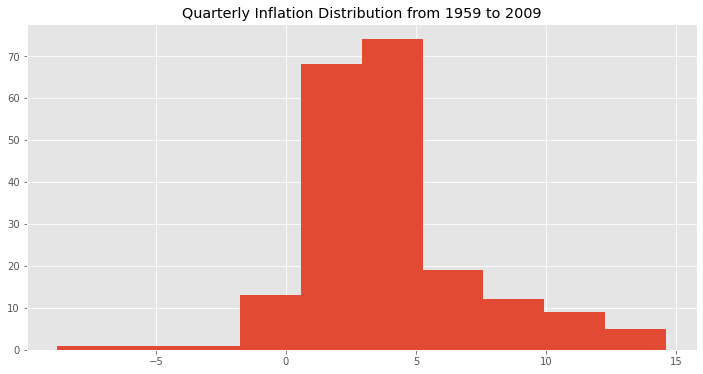

In [324]:
ax = df.infl.hist(figsize=(12,6))
ax.set(title='Quarterly Inflation Distribution from 1959 to 2009');

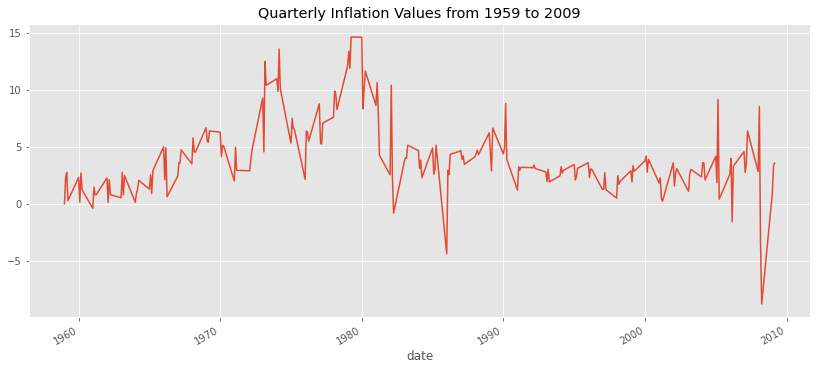

In [325]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
df.infl.plot(figsize=(14,6), title='Quarterly Inflation Values from 1959 to 2009');

Now plot the realgdp and apply the Hodrick-Prescott filter to it

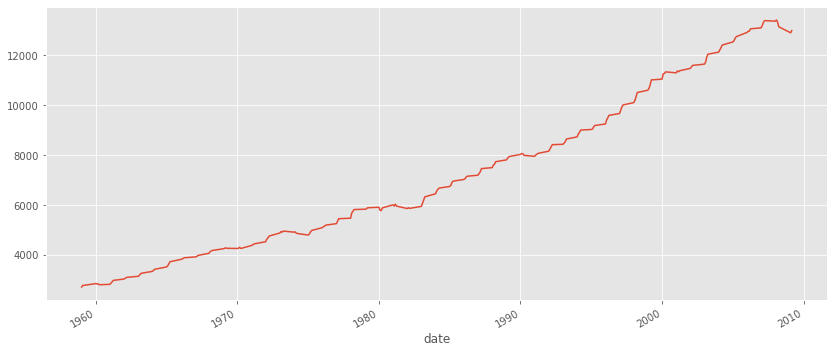

In [326]:
df.realgdp.plot(figsize=(14,6));

In [327]:
gdp_cycle, gdp_trend = hpfilter(df.realgdp, lamb=1600)

In [328]:
# Keep in mind that both gdp_cycle and gdp_trend are series
type(gdp_cycle)

pandas.core.series.Series

<AxesSubplot:xlabel='date'>

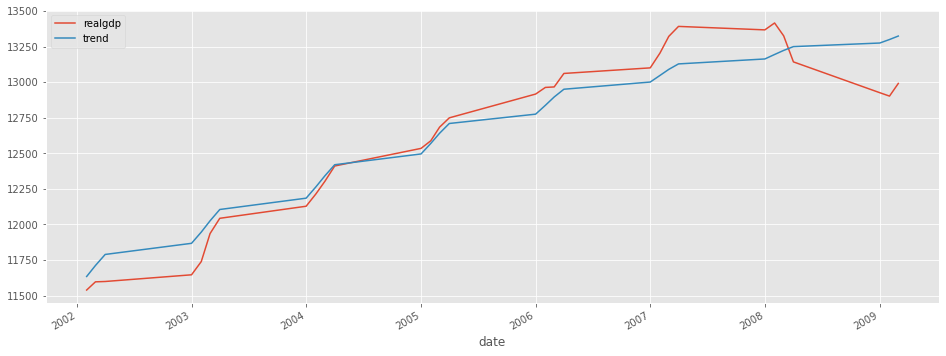

In [331]:
# plot the gdp trend over the actual gdp plot from 2002 onwards
df['trend'] = gdp_trend
df[['realgdp', 'trend']][df.index > '2002'].plot(figsize=(16,6))

<AxesSubplot:xlabel='date'>

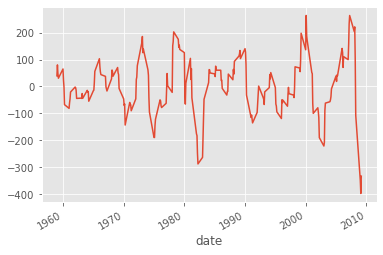

In [332]:
gdp_cycle.plot()

## ETS Decomposition

Now apply ETS decompisition to the number of monthly US airline passengers (in thousands) dataset.  

In [333]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\datasets\AirPassengers.csv', index_col=0, parse_dates=True) 
df.index.names = ['Date']
df.head()

,#Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [334]:
# drop the rows with null values, if any
df.dropna(inplace=True)

In [335]:
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

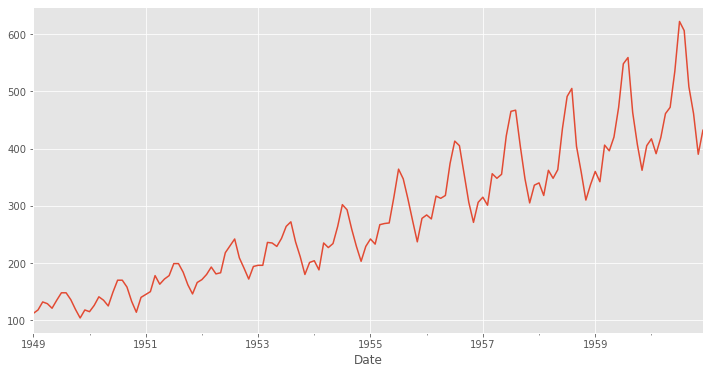

In [336]:
df.Passengers.plot(figsize=(12,6));

Although there is an overall upward trend, we cannot say it is either linear or exponential upward trend as the seasonality also 
plays a role in the upward trend. Now apply Hodrick-Prescott filter to classify the upward trend.

In [337]:
passengers_cycle, passengers_trend = hpfilter(df.Passengers, lamb=14400)

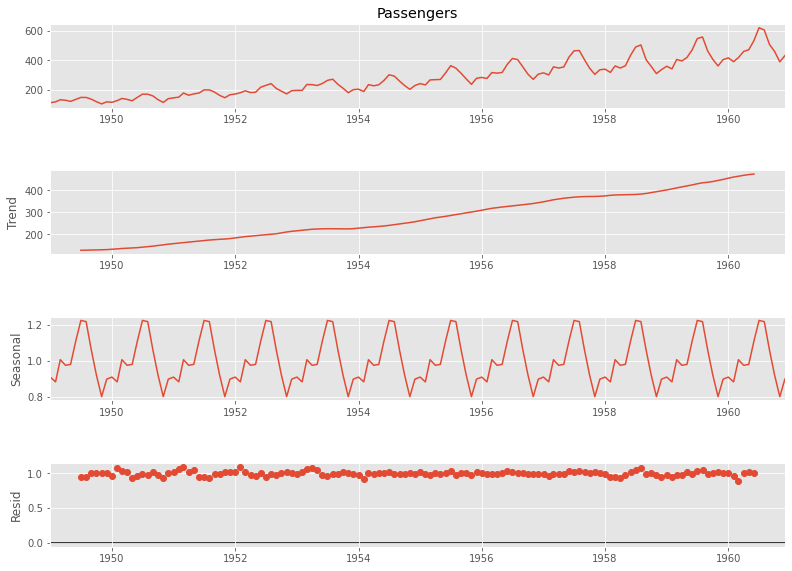

In [338]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df.Passengers, model='multiplicative') # model is multiplicative as the number of passengers increase more than at a linear rate
decomp_vis = decomposed.plot()
decomp_vis.set_size_inches((12, 9))

As it is hard to notice the movements in the resid composition, let's plot it seperately 

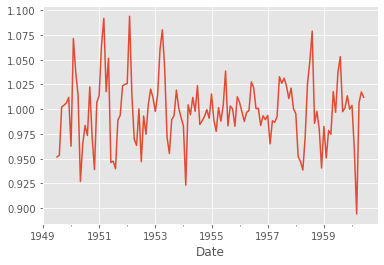

In [339]:
decomposed.resid.plot();

Plot a 6-month SMA over the actual trend

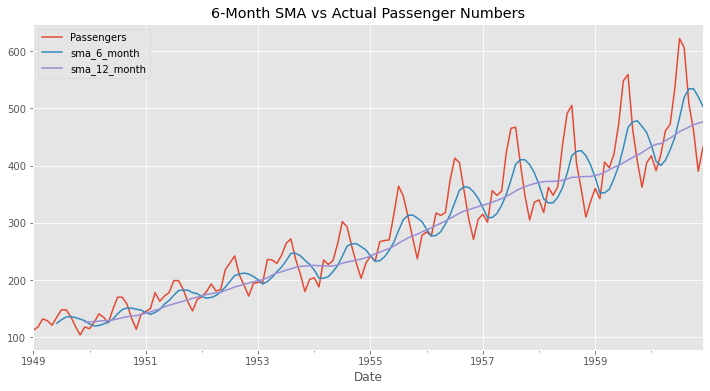

In [340]:
df['sma_6_month'] = df.Passengers.rolling(window = 6).mean()
df['sma_12_month'] = df.Passengers.rolling(window = 12).mean()
ax = df.plot(figsize=(12,6))
ax.set(title='6-Month SMA vs Actual Passenger Numbers');

## Holt-Winters Methods  <br>
Now plot a 12-month EWMA over the actual trend 

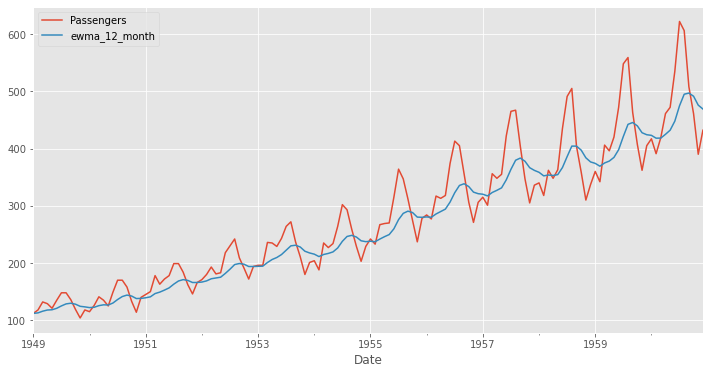

In [341]:
span = 12
alpha = 2/(1 + span)

df['ewma_12_month'] = df.Passengers.ewm(alpha=alpha, adjust=False).mean()
df[['Passengers', 'ewma_12_month']].plot(figsize=(12,6));

Notice that, compared to the SMA plots, EWMA showed greater increase at the ends of the dates as the actual trend also displays 
more significant increase at the end of the period

Now plot the 12-month EWMA with statsmodels

In [343]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Since the the index frequency is set to None by default, don't forget to change it to MS
df.index.freq = 'MS'

model = SimpleExpSmoothing(df.Passengers).fit(smoothing_level=alpha, optimized=False)
df['SES_12'] =  model.fittedvalues.shift(-1)
df.head()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Passengers,sma_6_month,sma_12_month,ewma_12_month,SES_12
Date,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,112.923077,112.923077
1949-03-01,132,NaN,NaN,115.857988,115.857988
1949-04-01,129,NaN,NaN,117.879836,117.879836
1949-05-01,121,NaN,NaN,118.359861,118.359861


In [344]:
model.fittedvalues.shift(-1)

Date
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

<AxesSubplot:xlabel='Date'>

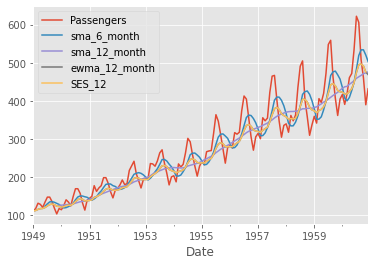

In [345]:
df.plot()

In [346]:
df.tail()

,Passengers,sma_6_month,sma_12_month,ewma_12_month,SES_12
Date,,,,,
1960-08-01,606,519.166667,463.333333,494.898619,494.898619
1960-09-01,508,534.000000,467.083333,496.914216,496.914216
1960-10-01,461,534.000000,471.583333,491.388952,491.388952
1960-11-01,390,520.333333,473.916667,475.790652,475.790652
1960-12-01,432,503.166667,476.166667,469.053629,NaN


Apply double exponential smoothing and compare it for the SES for the last two years.

In [372]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DES_12'] = ExponentialSmoothing(df.Passengers, trend='add').fit().fittedvalues.shift(-1)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:xlabel='Date'>

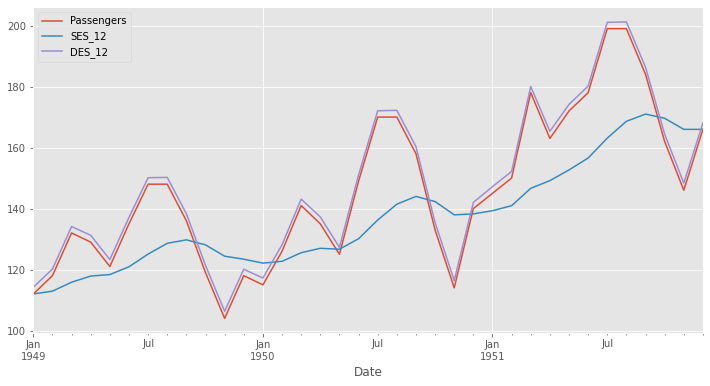

In [387]:
df[['Passengers', 'SES_12', 'DES_12']].iloc[:36].plot(figsize=(12,6))

DES fitted the number of passengers so incredibly well that it is hard to distinguish DES from the actual numbers! <br>
Lastly, compare triaple exponential smoothing with DES for the last two years in the dataset

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:xlabel='Date'>

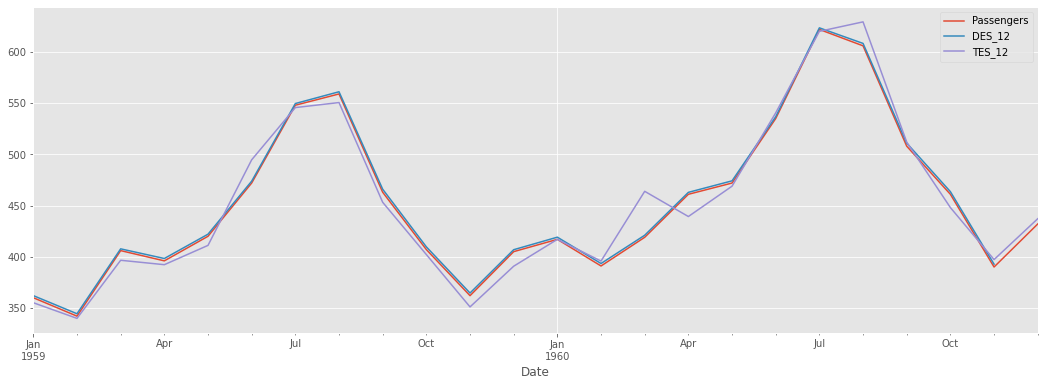

In [388]:
df['TES_12'] = ExponentialSmoothing(df.Passengers, trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues
df[['Passengers','DES_12', 'TES_12']].iloc[-24:].plot(figsize=(18,6))

<AxesSubplot:xlabel='Date'>

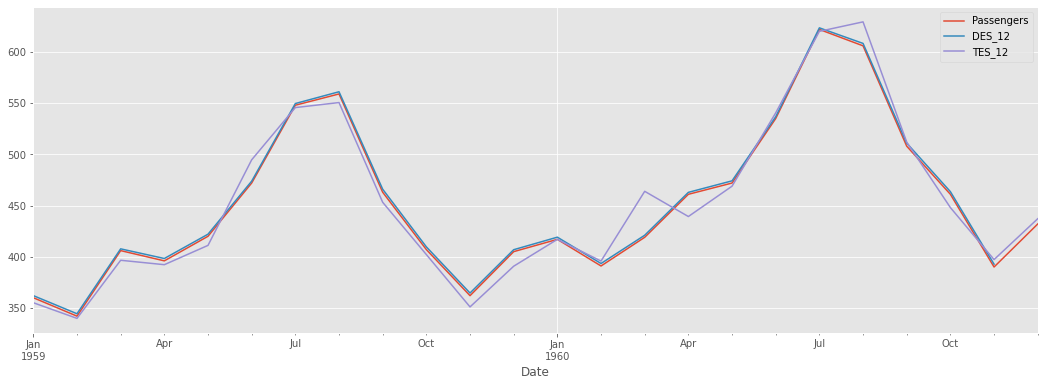

In [386]:
df[['Passengers','DES_12', 'TES_12']].iloc[-24:].plot(figsize=(18,6))